In [1]:
# Import Library Dependencies
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
import numpy as np

# Import Custom API Functions
from apidata import quandl_stock_data

%matplotlib notebook

In [2]:
pfolio_assets = [
    "AMZN",
    "PFE",
    "AMD",
    "HAL",
    "PG",
    "COF",    
]


In [ ]:
# Portfolio Stock Selection
pfolio_assets = [
    "NLY", 
    "T", 
    "AMZN", 
    "PG", 
    "BAC", 
    "PFE", 
    "FCX", 
    "MSFT", 
    "GM", 
    "QCOM",
]

print(f'Number of Portfolio Assets: {len(pfolio_assets)}')

In [3]:
# Initializing DataFrame
portfolio = quandl_stock_data(pfolio_assets[0], verbose=True) \
            .rename(columns={"Close": pfolio_assets[0].upper()})[pfolio_assets[0].upper()] \
            .reset_index()


[Quandl] Query API Summary:

--------------------------------------------------------------------------- 

- symbol: AMZN
- start_date: 2014-01-01
- end_date: 2019-01-01
- collapse: monthly
- data_type: pandas

 --------------------------------------------------------------------------- 


[Preview] Response DataFrame


               Open     High      Low   Close     Volume
Date                                                   
2014-01-02  398.80  399.360  394.020  397.97  2137800.0
2014-01-03  398.29  402.710  396.220  396.44  2210200.0
2014-01-06  395.85  397.000  388.420  393.63  3170600.0
2014-01-07  395.04  398.470  394.290  398.03  1916000.0
2014-01-08  398.47  403.000  396.040  401.92  2316500.0
2014-01-09  403.71  406.890  398.440  401.01  2103000.0
2014-01-10  402.53  403.764  393.800  397.66  2679500.0
2014-01-13  397.98  399.780  388.450  390.98  2844900.0
2014-01-14  392.13  398.630  391.290  397.54  2340100.0
2014-01-15  398.94  399.310  392.534  395.87  2678300.0 

--

In [4]:
# Generate Portfolio DataFrame:
# [1] Query Stock Return Data - Quandl API Call
# [2] Merge Stock Returns into Portfolio DataFrame 

for i, stock in enumerate(pfolio_assets[1:]):
    print(f"<Quandl API Call> [{i+1}] Stock Symbol: {stock}")
    add_stock = quandl_stock_data(stock) \
                .rename(columns={"Close": stock})[stock] \
                .reset_index()
    
    portfolio = pd.merge(portfolio, add_stock, on="Date", how="inner")
    
print (f"\nAsset Returns: Merged // Portfolio DataFrame: <Complete>")

<Quandl API Call> [1] Stock Symbol: PFE
<Quandl API Call> [2] Stock Symbol: AMD
<Quandl API Call> [3] Stock Symbol: HAL
<Quandl API Call> [4] Stock Symbol: PG
<Quandl API Call> [5] Stock Symbol: COF

Asset Returns: Merged // Portfolio DataFrame: <Complete>


In [5]:
# Set DataFrame Index (Date)
portfolio.set_index("Date", inplace=True)
portfolio.head(15)

,AMZN,PFE,AMD,HAL,PG,COF
Date,,,,,,
2014-01-02,397.97,30.46,3.95,50.01,80.54,77.25
2014-01-03,396.44,30.52,4.00,50.13,80.45,77.34
2014-01-06,393.63,30.55,4.13,50.32,80.64,76.59
2014-01-07,398.03,30.74,4.18,50.20,81.42,77.28
2014-01-08,401.92,30.95,4.18,49.50,80.24,77.85
2014-01-09,401.01,30.93,4.09,49.61,80.42,77.85
2014-01-10,397.66,30.69,4.17,50.52,80.30,78.02
2014-01-13,390.98,30.54,4.13,49.58,80.01,76.37
2014-01-14,397.54,31.00,4.30,50.40,80.87,77.36


In [6]:
# View DataFrame -- Data Completeness
portfolio.count()

AMZN    1064
PFE     1064
AMD     1064
HAL     1064
PG      1064
COF     1064
dtype: int64

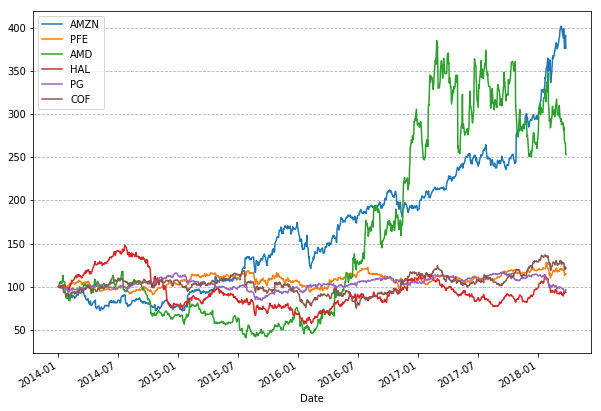

In [7]:
# [Visualize] Plot Data Frame -- Closing Prices
visual_plot = (portfolio/portfolio.iloc[0] * 100).plot(figsize=(10,7))
plt.grid(axis="y", linestyle="dashed")

In [8]:
# Convert Stock Price Data into Log Returns -- Removed Offset Row
log_returns = np.log(portfolio / portfolio.shift(1)).iloc[1:]
log_returns[:15]

,AMZN,PFE,AMD,HAL,PG,COF
Date,,,,,,
2014-01-03,-0.003852,0.001968,0.012579,0.002397,-0.001118,0.001164
2014-01-06,-0.007113,0.000982,0.031983,0.003783,0.002359,-0.009745
2014-01-07,0.011116,0.006200,0.012034,-0.002388,0.009626,0.008969
2014-01-08,0.009726,0.006808,0.000000,-0.014042,-0.014599,0.007349
2014-01-09,-0.002267,-0.000646,-0.021766,0.002220,0.002241,0.000000
2014-01-10,-0.008389,-0.007790,0.019371,0.018177,-0.001493,0.002181
2014-01-13,-0.016941,-0.004900,-0.009639,-0.018782,-0.003618,-0.021375
2014-01-14,0.016639,0.014950,0.040338,0.016404,0.010691,0.012880
2014-01-15,-0.004210,0.005790,0.038773,0.004751,-0.000990,-0.004275


In [9]:
# Calculate Average Annual Log Returns 
log_returns.mean()*250

AMZN    0.311589
PFE     0.032742
AMD     0.218455
HAL    -0.015200
PG     -0.008171
COF     0.045202
dtype: float64

In [10]:
# Portfolio Asset Covariance Matrix
log_returns.cov() * 250

,AMZN,PFE,AMD,HAL,PG,COF
AMZN,0.086065,0.012405,0.030296,0.021427,0.008945,0.013754
PFE,0.012405,0.030334,0.017896,0.015098,0.007854,0.016413
AMD,0.030296,0.017896,0.354742,0.038696,0.011578,0.031391
HAL,0.021427,0.015098,0.038696,0.095860,0.008888,0.026961
PG,0.008945,0.007854,0.011578,0.008888,0.019098,0.009539
COF,0.013754,0.016413,0.031391,0.026961,0.009539,0.055811


In [11]:
# Portfolio Asset Correlation Matrix
log_returns.corr()

,AMZN,PFE,AMD,HAL,PG,COF
AMZN,1.000000,0.242780,0.173386,0.235901,0.220633,0.198454
PFE,0.242780,1.000000,0.172524,0.279990,0.326310,0.398912
AMD,0.173386,0.172524,1.000000,0.209842,0.140662,0.223096
HAL,0.235901,0.279990,0.209842,1.000000,0.207726,0.368597
PG,0.220633,0.326310,0.140662,0.207726,1.000000,0.292179
COF,0.198454,0.398912,0.223096,0.368597,0.292179,1.000000


In [12]:
# Count Number of Assets in Portfolio
num_assets = (len(pfolio_assets) )
num_assets

6

In [13]:
# Simulate 10k Random Portfolios
pfolio_sims = []
pfolio = {}

mkt_return = .098
sim_trials = 5000
for i in range(sim_trials):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    
    WTSp = zip(pfolio_assets, weights)
    RTNp = np.sum(weights * log_returns.mean()) * 250
    VOLp = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))
    
    pfolio = {a:round(wt, 4) for a,wt in WTSp}
    pfolio["RTN"] = round(RTNp, 4)
    pfolio["VOL"] = round(VOLp, 4)
    pfolio["Sharpe"] = round((RTNp - mkt_return)/VOLp, 4)
    pfolio_sims.append(pfolio)
    
    print("\n",pfolio, "\n")

print(">>> Data Points Generated -- Simulation Complete <<<")


 {'AMZN': 0.0996, 'PFE': 0.2654, 'AMD': 0.0181, 'HAL': 0.2181, 'PG': 0.1657, 'COF': 0.2331, 'RTN': 0.0496, 'VOL': 0.1525, 'Sharpe': -0.3177} 


 {'AMZN': 0.2948, 'PFE': 0.0128, 'AMD': 0.1291, 'HAL': 0.0765, 'PG': 0.2822, 'COF': 0.2046, 'RTN': 0.1262, 'VOL': 0.1736, 'Sharpe': 0.1627} 


 {'AMZN': 0.0908, 'PFE': 0.2833, 'AMD': 0.2713, 'HAL': 0.128, 'PG': 0.1158, 'COF': 0.1108, 'RTN': 0.0989, 'VOL': 0.2164, 'Sharpe': 0.0044} 


 {'AMZN': 0.2072, 'PFE': 0.0016, 'AMD': 0.1255, 'HAL': 0.2541, 'PG': 0.3287, 'COF': 0.083, 'RTN': 0.0892, 'VOL': 0.1752, 'Sharpe': -0.0501} 


 {'AMZN': 0.2051, 'PFE': 0.1895, 'AMD': 0.2526, 'HAL': 0.0211, 'PG': 0.065, 'COF': 0.2667, 'RTN': 0.1365, 'VOL': 0.2164, 'Sharpe': 0.1778} 


 {'AMZN': 0.2898, 'PFE': 0.1669, 'AMD': 0.1999, 'HAL': 0.0873, 'PG': 0.0749, 'COF': 0.1813, 'RTN': 0.1457, 'VOL': 0.2014, 'Sharpe': 0.2367} 


 {'AMZN': 0.01, 'PFE': 0.2497, 'AMD': 0.3667, 'HAL': 0.1754, 'PG': 0.1483, 'COF': 0.0499, 'RTN': 0.0898, 'VOL': 0.2599, 'Sharpe': -0.0317} 





 {'AMZN': 0.2432, 'PFE': 0.1804, 'AMD': 0.116, 'HAL': 0.1863, 'PG': 0.0466, 'COF': 0.2275, 'RTN': 0.1141, 'VOL': 0.1814, 'Sharpe': 0.0887} 


 {'AMZN': 0.1599, 'PFE': 0.1732, 'AMD': 0.181, 'HAL': 0.1249, 'PG': 0.0926, 'COF': 0.2684, 'RTN': 0.1045, 'VOL': 0.1908, 'Sharpe': 0.0341} 


 {'AMZN': 0.1407, 'PFE': 0.0882, 'AMD': 0.1093, 'HAL': 0.3169, 'PG': 0.1989, 'COF': 0.146, 'RTN': 0.0708, 'VOL': 0.1795, 'Sharpe': -0.1517} 


 {'AMZN': 0.2362, 'PFE': 0.2605, 'AMD': 0.1806, 'HAL': 0.0671, 'PG': 0.2311, 'COF': 0.0244, 'RTN': 0.1198, 'VOL': 0.1785, 'Sharpe': 0.1221} 


 {'AMZN': 0.3298, 'PFE': 0.1766, 'AMD': 0.3438, 'HAL': 0.0397, 'PG': 0.0393, 'COF': 0.0708, 'RTN': 0.1859, 'VOL': 0.2617, 'Sharpe': 0.336} 


 {'AMZN': 0.093, 'PFE': 0.2018, 'AMD': 0.1462, 'HAL': 0.2249, 'PG': 0.1335, 'COF': 0.2006, 'RTN': 0.0721, 'VOL': 0.18, 'Sharpe': -0.144} 


 {'AMZN': 0.0577, 'PFE': 0.166, 'AMD': 0.1052, 'HAL': 0.0792, 'PG': 0.2539, 'COF': 0.3381, 'RTN': 0.0584, 'VOL': 0.1591, 'Sharpe': -0.249} 


 {'AM


 {'AMZN': 0.2517, 'PFE': 0.3007, 'AMD': 0.245, 'HAL': 0.0591, 'PG': 0.0282, 'COF': 0.1152, 'RTN': 0.1459, 'VOL': 0.2138, 'Sharpe': 0.2239} 


 {'AMZN': 0.0238, 'PFE': 0.1883, 'AMD': 0.2396, 'HAL': 0.2352, 'PG': 0.26, 'COF': 0.0531, 'RTN': 0.0626, 'VOL': 0.2043, 'Sharpe': -0.1731} 


 {'AMZN': 0.2717, 'PFE': 0.0642, 'AMD': 0.2528, 'HAL': 0.0245, 'PG': 0.3023, 'COF': 0.0844, 'RTN': 0.143, 'VOL': 0.2092, 'Sharpe': 0.2149} 


 {'AMZN': 0.046, 'PFE': 0.2958, 'AMD': 0.2223, 'HAL': 0.1249, 'PG': 0.0345, 'COF': 0.2764, 'RTN': 0.0829, 'VOL': 0.2058, 'Sharpe': -0.0733} 


 {'AMZN': 0.2222, 'PFE': 0.1397, 'AMD': 0.2079, 'HAL': 0.1787, 'PG': 0.0495, 'COF': 0.2021, 'RTN': 0.1252, 'VOL': 0.2077, 'Sharpe': 0.1311} 


 {'AMZN': 0.1794, 'PFE': 0.0671, 'AMD': 0.108, 'HAL': 0.2236, 'PG': 0.2532, 'COF': 0.1687, 'RTN': 0.0839, 'VOL': 0.1683, 'Sharpe': -0.084} 


 {'AMZN': 0.0411, 'PFE': 0.3281, 'AMD': 0.1517, 'HAL': 0.288, 'PG': 0.0288, 'COF': 0.1624, 'RTN': 0.0594, 'VOL': 0.1917, 'Sharpe': -0.2013} 


 {


 {'AMZN': 0.1648, 'PFE': 0.0903, 'AMD': 0.2628, 'HAL': 0.2347, 'PG': 0.1873, 'COF': 0.06, 'RTN': 0.1093, 'VOL': 0.2221, 'Sharpe': 0.0511} 


 {'AMZN': 0.2566, 'PFE': 0.2253, 'AMD': 0.1966, 'HAL': 0.0993, 'PG': 0.0929, 'COF': 0.1292, 'RTN': 0.1339, 'VOL': 0.1951, 'Sharpe': 0.1839} 


 {'AMZN': 0.1101, 'PFE': 0.0598, 'AMD': 0.3538, 'HAL': 0.3604, 'PG': 0.0434, 'COF': 0.0725, 'RTN': 0.111, 'VOL': 0.2794, 'Sharpe': 0.0466} 


 {'AMZN': 0.1936, 'PFE': 0.0887, 'AMD': 0.1827, 'HAL': 0.1913, 'PG': 0.1631, 'COF': 0.1806, 'RTN': 0.1071, 'VOL': 0.1926, 'Sharpe': 0.0471} 


 {'AMZN': 0.1127, 'PFE': 0.2628, 'AMD': 0.2203, 'HAL': 0.0239, 'PG': 0.1749, 'COF': 0.2054, 'RTN': 0.0993, 'VOL': 0.1915, 'Sharpe': 0.007} 


 {'AMZN': 0.1969, 'PFE': 0.1795, 'AMD': 0.1879, 'HAL': 0.2278, 'PG': 0.1354, 'COF': 0.0725, 'RTN': 0.107, 'VOL': 0.1949, 'Sharpe': 0.0461} 


 {'AMZN': 0.2125, 'PFE': 0.1406, 'AMD': 0.0483, 'HAL': 0.126, 'PG': 0.2235, 'COF': 0.2491, 'RTN': 0.0889, 'VOL': 0.1524, 'Sharpe': -0.0598} 


 {'


 {'AMZN': 0.0238, 'PFE': 0.5659, 'AMD': 0.107, 'HAL': 0.0301, 'PG': 0.1574, 'COF': 0.1157, 'RTN': 0.0528, 'VOL': 0.1551, 'Sharpe': -0.2913} 


 {'AMZN': 0.2271, 'PFE': 0.2279, 'AMD': 0.1248, 'HAL': 0.0729, 'PG': 0.2814, 'COF': 0.0659, 'RTN': 0.1051, 'VOL': 0.1584, 'Sharpe': 0.0446} 


 {'AMZN': 0.138, 'PFE': 0.1428, 'AMD': 0.1056, 'HAL': 0.0834, 'PG': 0.2403, 'COF': 0.29, 'RTN': 0.0806, 'VOL': 0.1588, 'Sharpe': -0.1096} 


 {'AMZN': 0.0745, 'PFE': 0.2501, 'AMD': 0.3149, 'HAL': 0.189, 'PG': 0.0481, 'COF': 0.1234, 'RTN': 0.1025, 'VOL': 0.243, 'Sharpe': 0.0185} 


 {'AMZN': 0.0184, 'PFE': 0.101, 'AMD': 0.4252, 'HAL': 0.0774, 'PG': 0.2072, 'COF': 0.1707, 'RTN': 0.1068, 'VOL': 0.2859, 'Sharpe': 0.0307} 


 {'AMZN': 0.0145, 'PFE': 0.0197, 'AMD': 0.1127, 'HAL': 0.2891, 'PG': 0.3136, 'COF': 0.2504, 'RTN': 0.0342, 'VOL': 0.1761, 'Sharpe': -0.3625} 


 {'AMZN': 0.2123, 'PFE': 0.234, 'AMD': 0.0623, 'HAL': 0.2172, 'PG': 0.2629, 'COF': 0.0112, 'RTN': 0.0825, 'VOL': 0.1537, 'Sharpe': -0.101} 


 {'

 {'AMZN': 0.1512, 'PFE': 0.036, 'AMD': 0.2033, 'HAL': 0.2841, 'PG': 0.1879, 'COF': 0.1376, 'RTN': 0.0931, 'VOL': 0.2063, 'Sharpe': -0.0239} 


 {'AMZN': 0.0289, 'PFE': 0.0092, 'AMD': 0.2045, 'HAL': 0.1671, 'PG': 0.4087, 'COF': 0.1816, 'RTN': 0.0563, 'VOL': 0.187, 'Sharpe': -0.223} 


 {'AMZN': 0.1913, 'PFE': 0.2507, 'AMD': 0.0224, 'HAL': 0.1917, 'PG': 0.1851, 'COF': 0.1589, 'RTN': 0.0755, 'VOL': 0.1499, 'Sharpe': -0.1503} 


 {'AMZN': 0.3208, 'PFE': 0.0412, 'AMD': 0.2047, 'HAL': 0.1256, 'PG': 0.2497, 'COF': 0.0578, 'RTN': 0.1447, 'VOL': 0.2012, 'Sharpe': 0.2321} 


 {'AMZN': 0.2875, 'PFE': 0.1869, 'AMD': 0.1689, 'HAL': 0.2402, 'PG': 0.0576, 'COF': 0.0589, 'RTN': 0.1311, 'VOL': 0.2004, 'Sharpe': 0.1654} 


 {'AMZN': 0.1787, 'PFE': 0.0196, 'AMD': 0.2973, 'HAL': 0.0228, 'PG': 0.2335, 'COF': 0.248, 'RTN': 0.1302, 'VOL': 0.2298, 'Sharpe': 0.1402} 


 {'AMZN': 0.0954, 'PFE': 0.2818, 'AMD': 0.1076, 'HAL': 0.2641, 'PG': 0.2015, 'COF': 0.0497, 'RTN': 0.059, 'VOL': 0.1652, 'Sharpe': -0.2358} 





 {'AMZN': 0.1851, 'PFE': 0.2395, 'AMD': 0.0846, 'HAL': 0.0737, 'PG': 0.3094, 'COF': 0.1077, 'RTN': 0.0852, 'VOL': 0.1443, 'Sharpe': -0.0886} 


 {'AMZN': 0.2011, 'PFE': 0.2017, 'AMD': 0.0727, 'HAL': 0.1178, 'PG': 0.2147, 'COF': 0.1921, 'RTN': 0.0903, 'VOL': 0.1522, 'Sharpe': -0.0507} 


 {'AMZN': 0.0312, 'PFE': 0.0157, 'AMD': 0.1095, 'HAL': 0.2463, 'PG': 0.3642, 'COF': 0.2332, 'RTN': 0.038, 'VOL': 0.1673, 'Sharpe': -0.3588} 


 {'AMZN': 0.2519, 'PFE': 0.0657, 'AMD': 0.1948, 'HAL': 0.2573, 'PG': 0.0917, 'COF': 0.1386, 'RTN': 0.1248, 'VOL': 0.21, 'Sharpe': 0.1276} 


 {'AMZN': 0.0233, 'PFE': 0.0636, 'AMD': 0.2088, 'HAL': 0.1077, 'PG': 0.2832, 'COF': 0.3134, 'RTN': 0.0652, 'VOL': 0.1934, 'Sharpe': -0.1697} 


 {'AMZN': 0.1207, 'PFE': 0.2791, 'AMD': 0.1312, 'HAL': 0.1084, 'PG': 0.1375, 'COF': 0.2231, 'RTN': 0.0827, 'VOL': 0.1666, 'Sharpe': -0.0916} 


 {'AMZN': 0.2889, 'PFE': 0.2581, 'AMD': 0.0222, 'HAL': 0.0064, 'PG': 0.1457, 'COF': 0.2787, 'RTN': 0.1146, 'VOL': 0.1548, 'Sharpe': 0.1074}


 {'AMZN': 0.003, 'PFE': 0.2771, 'AMD': 0.2269, 'HAL': 0.0494, 'PG': 0.1289, 'COF': 0.3146, 'RTN': 0.072, 'VOL': 0.2015, 'Sharpe': -0.129} 


 {'AMZN': 0.2445, 'PFE': 0.17, 'AMD': 0.0818, 'HAL': 0.2207, 'PG': 0.1351, 'COF': 0.1479, 'RTN': 0.1019, 'VOL': 0.1693, 'Sharpe': 0.0228} 


 {'AMZN': 0.1567, 'PFE': 0.2027, 'AMD': 0.1653, 'HAL': 0.0939, 'PG': 0.1604, 'COF': 0.2211, 'RTN': 0.0988, 'VOL': 0.1773, 'Sharpe': 0.0046} 


 {'AMZN': 0.2516, 'PFE': 0.08, 'AMD': 0.1298, 'HAL': 0.2167, 'PG': 0.1817, 'COF': 0.1402, 'RTN': 0.1109, 'VOL': 0.1807, 'Sharpe': 0.0715} 


 {'AMZN': 0.1861, 'PFE': 0.2118, 'AMD': 0.159, 'HAL': 0.1995, 'PG': 0.13, 'COF': 0.1137, 'RTN': 0.1007, 'VOL': 0.1824, 'Sharpe': 0.0147} 


 {'AMZN': 0.033, 'PFE': 0.3154, 'AMD': 0.3155, 'HAL': 0.0014, 'PG': 0.1016, 'COF': 0.233, 'RTN': 0.0992, 'VOL': 0.2349, 'Sharpe': 0.0051} 


 {'AMZN': 0.2302, 'PFE': 0.1565, 'AMD': 0.2381, 'HAL': 0.0767, 'PG': 0.0604, 'COF': 0.2382, 'RTN': 0.138, 'VOL': 0.2137, 'Sharpe': 0.1871} 


 {'AMZN': 



 {'AMZN': 0.3804, 'PFE': 0.0103, 'AMD': 0.335, 'HAL': 0.1123, 'PG': 0.0352, 'COF': 0.1268, 'RTN': 0.1958, 'VOL': 0.2694, 'Sharpe': 0.3629} 


 {'AMZN': 0.2773, 'PFE': 0.1893, 'AMD': 0.0163, 'HAL': 0.2039, 'PG': 0.2093, 'COF': 0.1038, 'RTN': 0.0961, 'VOL': 0.1561, 'Sharpe': -0.0124} 


 {'AMZN': 0.1125, 'PFE': 0.2393, 'AMD': 0.0502, 'HAL': 0.1109, 'PG': 0.0358, 'COF': 0.4513, 'RTN': 0.0723, 'VOL': 0.1708, 'Sharpe': -0.1506} 


 {'AMZN': 0.0208, 'PFE': 0.2958, 'AMD': 0.1909, 'HAL': 0.1554, 'PG': 0.1546, 'COF': 0.1825, 'RTN': 0.0625, 'VOL': 0.1858, 'Sharpe': -0.1911} 


 {'AMZN': 0.0364, 'PFE': 0.2527, 'AMD': 0.009, 'HAL': 0.1013, 'PG': 0.3607, 'COF': 0.2399, 'RTN': 0.0279, 'VOL': 0.1335, 'Sharpe': -0.5251} 


 {'AMZN': 0.0581, 'PFE': 0.1201, 'AMD': 0.1923, 'HAL': 0.2136, 'PG': 0.1997, 'COF': 0.2162, 'RTN': 0.0689, 'VOL': 0.1926, 'Sharpe': -0.1509} 


 {'AMZN': 0.0643, 'PFE': 0.2816, 'AMD': 0.0539, 'HAL': 0.0799, 'PG': 0.1864, 'COF': 0.3338, 'RTN': 0.0534, 'VOL': 0.1506, 'Sharpe': -0.29


 {'AMZN': 0.1731, 'PFE': 0.0812, 'AMD': 0.1912, 'HAL': 0.1185, 'PG': 0.2251, 'COF': 0.2108, 'RTN': 0.1043, 'VOL': 0.1876, 'Sharpe': 0.0334} 


 {'AMZN': 0.0988, 'PFE': 0.2044, 'AMD': 0.2392, 'HAL': 0.1901, 'PG': 0.2308, 'COF': 0.0366, 'RTN': 0.0866, 'VOL': 0.2019, 'Sharpe': -0.0564} 


 {'AMZN': 0.0369, 'PFE': 0.3395, 'AMD': 0.2087, 'HAL': 0.1251, 'PG': 0.0322, 'COF': 0.2576, 'RTN': 0.0777, 'VOL': 0.1998, 'Sharpe': -0.1017} 


 {'AMZN': 0.0543, 'PFE': 0.0498, 'AMD': 0.3845, 'HAL': 0.1096, 'PG': 0.2697, 'COF': 0.1322, 'RTN': 0.1047, 'VOL': 0.2654, 'Sharpe': 0.0251} 


 {'AMZN': 0.2775, 'PFE': 0.018, 'AMD': 0.2645, 'HAL': 0.2143, 'PG': 0.0752, 'COF': 0.1505, 'RTN': 0.1478, 'VOL': 0.2363, 'Sharpe': 0.2105} 


 {'AMZN': 0.251, 'PFE': 0.2281, 'AMD': 0.0581, 'HAL': 0.0675, 'PG': 0.1871, 'COF': 0.2083, 'RTN': 0.1052, 'VOL': 0.1524, 'Sharpe': 0.0474} 


 {'AMZN': 0.1003, 'PFE': 0.0808, 'AMD': 0.1999, 'HAL': 0.0541, 'PG': 0.2574, 'COF': 0.3075, 'RTN': 0.0885, 'VOL': 0.1882, 'Sharpe': -0.0502} 

 {'AMZN': 0.1673, 'PFE': 0.1919, 'AMD': 0.1451, 'HAL': 0.1781, 'PG': 0.1279, 'COF': 0.1897, 'RTN': 0.0949, 'VOL': 0.1778, 'Sharpe': -0.0172} 


 {'AMZN': 0.1306, 'PFE': 0.2435, 'AMD': 0.2161, 'HAL': 0.242, 'PG': 0.0877, 'COF': 0.08, 'RTN': 0.0951, 'VOL': 0.2051, 'Sharpe': -0.0141} 


 {'AMZN': 0.1154, 'PFE': 0.1597, 'AMD': 0.1583, 'HAL': 0.2239, 'PG': 0.1643, 'COF': 0.1784, 'RTN': 0.0791, 'VOL': 0.1825, 'Sharpe': -0.1036} 


 {'AMZN': 0.2666, 'PFE': 0.2024, 'AMD': 0.0113, 'HAL': 0.2675, 'PG': 0.1304, 'COF': 0.1218, 'RTN': 0.0926, 'VOL': 0.1658, 'Sharpe': -0.0329} 


 {'AMZN': 0.0975, 'PFE': 0.1848, 'AMD': 0.117, 'HAL': 0.2656, 'PG': 0.2991, 'COF': 0.0361, 'RTN': 0.0571, 'VOL': 0.1645, 'Sharpe': -0.2485} 


 {'AMZN': 0.0089, 'PFE': 0.2569, 'AMD': 0.1651, 'HAL': 0.1948, 'PG': 0.2806, 'COF': 0.0937, 'RTN': 0.0462, 'VOL': 0.1719, 'Sharpe': -0.3012} 


 {'AMZN': 0.2632, 'PFE': 0.2558, 'AMD': 0.1053, 'HAL': 0.0465, 'PG': 0.2668, 'COF': 0.0624, 'RTN': 0.1133, 'VOL': 0.1559, 'Sharpe': 0.0983} 


 {'AMZN': 0.1625, 'PFE': 0.2577, 'AMD': 0.2577, 'HAL': 0.0867, 'PG': 0.1175, 'COF': 0.1179, 'RTN': 0.1184, 'VOL': 0.211, 'Sharpe': 0.0968} 


 {'AMZN': 0.2559, 'PFE': 0.094, 'AMD': 0.1513, 'HAL': 0.0013, 'PG': 0.2087, 'COF': 0.289, 'RTN': 0.1272, 'VOL': 0.1784, 'Sharpe': 0.1636} 


 {'AMZN': 0.2415, 'PFE': 0.2136, 'AMD': 0.0787, 'HAL': 0.1799, 'PG': 0.1634, 'COF': 0.1228, 'RTN': 0.1009, 'VOL': 0.1617, 'Sharpe': 0.0182} 


 {'AMZN': 0.2024, 'PFE': 0.0554, 'AMD': 0.1019, 'HAL': 0.2231, 'PG': 0.2581, 'COF': 0.1591, 'RTN': 0.0888, 'VOL': 0.168, 'Sharpe': -0.0546} 


 {'AMZN': 0.1732, 'PFE': 0.1571, 'AMD': 0.1506, 'HAL': 0.2012, 'PG': 0.1414, 'COF': 0.1766, 'RTN': 0.0958, 'VOL': 0.1813, 'Sharpe': -0.0123} 


 {'AMZN': 0.0261, 'PFE': 0.3171, 'AMD': 0.3508, 'HAL': 0.0974, 'PG': 0.128, 'COF': 0.0805, 'RTN': 0.0963, 'VOL': 0.2491, 'Sharpe': -0.0069} 


 {'AMZN': 0.0826, 'PFE': 0.3796, 'AMD': 0.1011, 'HAL': 0.3716, 'PG': 0.0464, 'COF': 0.0186, 'RTN': 0.0551, 'VOL': 0.1859, 'Sharpe': -0.2309} 




 {'AMZN': 0.2513, 'PFE': 0.2296, 'AMD': 0.1945, 'HAL': 0.0084, 'PG': 0.2155, 'COF': 0.1007, 'RTN': 0.131, 'VOL': 0.1846, 'Sharpe': 0.1786} 


 {'AMZN': 0.2863, 'PFE': 0.0623, 'AMD': 0.1296, 'HAL': 0.1558, 'PG': 0.1639, 'COF': 0.2021, 'RTN': 0.125, 'VOL': 0.1815, 'Sharpe': 0.1488} 


 {'AMZN': 0.0135, 'PFE': 0.0999, 'AMD': 0.3236, 'HAL': 0.1254, 'PG': 0.2463, 'COF': 0.1913, 'RTN': 0.0829, 'VOL': 0.2384, 'Sharpe': -0.0633} 


 {'AMZN': 0.2194, 'PFE': 0.0687, 'AMD': 0.1926, 'HAL': 0.1595, 'PG': 0.1658, 'COF': 0.1939, 'RTN': 0.1177, 'VOL': 0.196, 'Sharpe': 0.1005} 


 {'AMZN': 0.1016, 'PFE': 0.1694, 'AMD': 0.2379, 'HAL': 0.1962, 'PG': 0.0258, 'COF': 0.269, 'RTN': 0.0982, 'VOL': 0.219, 'Sharpe': 0.0007} 


 {'AMZN': 0.0838, 'PFE': 0.2208, 'AMD': 0.2048, 'HAL': 0.001, 'PG': 0.2884, 'COF': 0.2011, 'RTN': 0.0848, 'VOL': 0.18, 'Sharpe': -0.0733} 


 {'AMZN': 0.2334, 'PFE': 0.0988, 'AMD': 0.208, 'HAL': 0.091, 'PG': 0.2141, 'COF': 0.1547, 'RTN': 0.1253, 'VOL': 0.1943, 'Sharpe': 0.1403} 


 {'AMZ


 {'AMZN': 0.1862, 'PFE': 0.2279, 'AMD': 0.1698, 'HAL': 0.083, 'PG': 0.2398, 'COF': 0.0933, 'RTN': 0.1036, 'VOL': 0.1723, 'Sharpe': 0.0324} 


 {'AMZN': 0.1009, 'PFE': 0.3202, 'AMD': 0.2798, 'HAL': 0.0118, 'PG': 0.1317, 'COF': 0.1556, 'RTN': 0.1088, 'VOL': 0.216, 'Sharpe': 0.0502} 


 {'AMZN': 0.0654, 'PFE': 0.1212, 'AMD': 0.2488, 'HAL': 0.173, 'PG': 0.2514, 'COF': 0.1402, 'RTN': 0.0804, 'VOL': 0.2065, 'Sharpe': -0.0855} 


 {'AMZN': 0.0896, 'PFE': 0.1295, 'AMD': 0.4355, 'HAL': 0.1067, 'PG': 0.083, 'COF': 0.1558, 'RTN': 0.132, 'VOL': 0.2965, 'Sharpe': 0.1148} 


 {'AMZN': 0.0326, 'PFE': 0.2746, 'AMD': 0.1139, 'HAL': 0.0861, 'PG': 0.3279, 'COF': 0.1649, 'RTN': 0.0475, 'VOL': 0.1483, 'Sharpe': -0.3405} 


 {'AMZN': 0.2053, 'PFE': 0.2158, 'AMD': 0.2916, 'HAL': 0.062, 'PG': 0.0236, 'COF': 0.2017, 'RTN': 0.1427, 'VOL': 0.2336, 'Sharpe': 0.1914} 


 {'AMZN': 0.0738, 'PFE': 0.1501, 'AMD': 0.2968, 'HAL': 0.1127, 'PG': 0.0846, 'COF': 0.2819, 'RTN': 0.1031, 'VOL': 0.2352, 'Sharpe': 0.0216} 


 {


 {'AMZN': 0.1341, 'PFE': 0.2409, 'AMD': 0.0956, 'HAL': 0.1669, 'PG': 0.2367, 'COF': 0.1258, 'RTN': 0.0718, 'VOL': 0.1536, 'Sharpe': -0.1708} 


 {'AMZN': 0.2122, 'PFE': 0.0307, 'AMD': 0.1048, 'HAL': 0.2135, 'PG': 0.2142, 'COF': 0.2246, 'RTN': 0.0952, 'VOL': 0.1736, 'Sharpe': -0.0163} 


 {'AMZN': 0.1979, 'PFE': 0.1295, 'AMD': 0.1337, 'HAL': 0.2265, 'PG': 0.2636, 'COF': 0.0487, 'RTN': 0.0917, 'VOL': 0.1723, 'Sharpe': -0.0364} 


 {'AMZN': 0.2126, 'PFE': 0.0743, 'AMD': 0.266, 'HAL': 0.0475, 'PG': 0.0937, 'COF': 0.3058, 'RTN': 0.1391, 'VOL': 0.2256, 'Sharpe': 0.1823} 


 {'AMZN': 0.2924, 'PFE': 0.1877, 'AMD': 0.2877, 'HAL': 0.0805, 'PG': 0.1204, 'COF': 0.0313, 'RTN': 0.1593, 'VOL': 0.2315, 'Sharpe': 0.2649} 


 {'AMZN': 0.1633, 'PFE': 0.0252, 'AMD': 0.3333, 'HAL': 0.072, 'PG': 0.0973, 'COF': 0.3089, 'RTN': 0.1366, 'VOL': 0.2548, 'Sharpe': 0.1515} 


 {'AMZN': 0.1041, 'PFE': 0.2128, 'AMD': 0.2911, 'HAL': 0.135, 'PG': 0.1814, 'COF': 0.0756, 'RTN': 0.1029, 'VOL': 0.223, 'Sharpe': 0.0219} 




 {'AMZN': 0.0389, 'PFE': 0.3242, 'AMD': 0.1545, 'HAL': 0.2533, 'PG': 0.0576, 'COF': 0.1715, 'RTN': 0.0599, 'VOL': 0.1872, 'Sharpe': -0.2035} 


 {'AMZN': 0.2115, 'PFE': 0.0626, 'AMD': 0.0584, 'HAL': 0.3791, 'PG': 0.1722, 'COF': 0.1163, 'RTN': 0.0788, 'VOL': 0.1835, 'Sharpe': -0.1047} 


 {'AMZN': 0.2749, 'PFE': 0.1122, 'AMD': 0.1996, 'HAL': 0.188, 'PG': 0.0045, 'COF': 0.2207, 'RTN': 0.14, 'VOL': 0.213, 'Sharpe': 0.1974} 


 {'AMZN': 0.0876, 'PFE': 0.2302, 'AMD': 0.2503, 'HAL': 0.1487, 'PG': 0.1835, 'COF': 0.0997, 'RTN': 0.0903, 'VOL': 0.2059, 'Sharpe': -0.0376} 


 {'AMZN': 0.0023, 'PFE': 0.2847, 'AMD': 0.297, 'HAL': 0.1091, 'PG': 0.2787, 'COF': 0.0282, 'RTN': 0.0723, 'VOL': 0.2186, 'Sharpe': -0.1177} 


 {'AMZN': 0.0975, 'PFE': 0.2373, 'AMD': 0.2933, 'HAL': 0.2476, 'PG': 0.0899, 'COF': 0.0345, 'RTN': 0.0993, 'VOL': 0.2353, 'Sharpe': 0.0054} 


 {'AMZN': 0.0463, 'PFE': 0.0393, 'AMD': 0.1211, 'HAL': 0.2576, 'PG': 0.2765, 'COF': 0.2593, 'RTN': 0.0477, 'VOL': 0.1756, 'Sharpe': -0.2865} 



 {'AMZN': 0.1739, 'PFE': 0.027, 'AMD': 0.2892, 'HAL': 0.1734, 'PG': 0.1806, 'COF': 0.1558, 'RTN': 0.1212, 'VOL': 0.2325, 'Sharpe': 0.0997} 


 {'AMZN': 0.154, 'PFE': 0.0029, 'AMD': 0.243, 'HAL': 0.0291, 'PG': 0.2587, 'COF': 0.3122, 'RTN': 0.1127, 'VOL': 0.2081, 'Sharpe': 0.0708} 


 {'AMZN': 0.2234, 'PFE': 0.2594, 'AMD': 0.2674, 'HAL': 0.0024, 'PG': 0.0503, 'COF': 0.197, 'RTN': 0.145, 'VOL': 0.2206, 'Sharpe': 0.2129} 


 {'AMZN': 0.1686, 'PFE': 0.1053, 'AMD': 0.2714, 'HAL': 0.0566, 'PG': 0.2767, 'COF': 0.1214, 'RTN': 0.1176, 'VOL': 0.2119, 'Sharpe': 0.0927} 


 {'AMZN': 0.1185, 'PFE': 0.2114, 'AMD': 0.2087, 'HAL': 0.2038, 'PG': 0.137, 'COF': 0.1206, 'RTN': 0.0907, 'VOL': 0.1971, 'Sharpe': -0.0372} 


 {'AMZN': 0.2223, 'PFE': 0.1481, 'AMD': 0.216, 'HAL': 0.1754, 'PG': 0.0788, 'COF': 0.1594, 'RTN': 0.1252, 'VOL': 0.2074, 'Sharpe': 0.1311} 


 {'AMZN': 0.0487, 'PFE': 0.2874, 'AMD': 0.1145, 'HAL': 0.0061, 'PG': 0.2671, 'COF': 0.2762, 'RTN': 0.0598, 'VOL': 0.1536, 'Sharpe': -0.2486} 


 {'


 {'AMZN': 0.3045, 'PFE': 0.0738, 'AMD': 0.1594, 'HAL': 0.0339, 'PG': 0.091, 'COF': 0.3374, 'RTN': 0.1461, 'VOL': 0.1945, 'Sharpe': 0.2473} 


 {'AMZN': 0.041, 'PFE': 0.205, 'AMD': 0.2116, 'HAL': 0.2927, 'PG': 0.0626, 'COF': 0.1871, 'RTN': 0.0692, 'VOL': 0.212, 'Sharpe': -0.1357} 


 {'AMZN': 0.3619, 'PFE': 0.0734, 'AMD': 0.3226, 'HAL': 0.0092, 'PG': 0.1647, 'COF': 0.0681, 'RTN': 0.1872, 'VOL': 0.2512, 'Sharpe': 0.3553} 


 {'AMZN': 0.0565, 'PFE': 0.2421, 'AMD': 0.128, 'HAL': 0.4543, 'PG': 0.0411, 'COF': 0.078, 'RTN': 0.0498, 'VOL': 0.2069, 'Sharpe': -0.233} 


 {'AMZN': 0.024, 'PFE': 0.1236, 'AMD': 0.2846, 'HAL': 0.0496, 'PG': 0.1807, 'COF': 0.3374, 'RTN': 0.0867, 'VOL': 0.2258, 'Sharpe': -0.0499} 


 {'AMZN': 0.2296, 'PFE': 0.0472, 'AMD': 0.1872, 'HAL': 0.1065, 'PG': 0.1084, 'COF': 0.3212, 'RTN': 0.126, 'VOL': 0.2001, 'Sharpe': 0.1398} 


 {'AMZN': 0.1683, 'PFE': 0.1267, 'AMD': 0.1691, 'HAL': 0.158, 'PG': 0.2048, 'COF': 0.173, 'RTN': 0.0973, 'VOL': 0.1808, 'Sharpe': -0.004} 


 {'AMZ

 {'AMZN': 0.2022, 'PFE': 0.09, 'AMD': 0.0892, 'HAL': 0.1647, 'PG': 0.1836, 'COF': 0.2702, 'RTN': 0.0937, 'VOL': 0.1666, 'Sharpe': -0.026} 


 {'AMZN': 0.2304, 'PFE': 0.0731, 'AMD': 0.1454, 'HAL': 0.345, 'PG': 0.1829, 'COF': 0.0232, 'RTN': 0.1003, 'VOL': 0.197, 'Sharpe': 0.0115} 


 {'AMZN': 0.1881, 'PFE': 0.2586, 'AMD': 0.0034, 'HAL': 0.056, 'PG': 0.2051, 'COF': 0.2887, 'RTN': 0.0784, 'VOL': 0.1441, 'Sharpe': -0.1363} 


 {'AMZN': 0.1436, 'PFE': 0.3494, 'AMD': 0.062, 'HAL': 0.1846, 'PG': 0.2223, 'COF': 0.0382, 'RTN': 0.0668, 'VOL': 0.1476, 'Sharpe': -0.2113} 


 {'AMZN': 0.1753, 'PFE': 0.0317, 'AMD': 0.1753, 'HAL': 0.3933, 'PG': 0.0382, 'COF': 0.1863, 'RTN': 0.0961, 'VOL': 0.2214, 'Sharpe': -0.0086} 


 {'AMZN': 0.1701, 'PFE': 0.0523, 'AMD': 0.2569, 'HAL': 0.0344, 'PG': 0.1163, 'COF': 0.37, 'RTN': 0.1261, 'VOL': 0.2223, 'Sharpe': 0.1265} 


 {'AMZN': 0.2282, 'PFE': 0.0644, 'AMD': 0.1546, 'HAL': 0.2021, 'PG': 0.2328, 'COF': 0.1179, 'RTN': 0.1073, 'VOL': 0.1824, 'Sharpe': 0.0512} 


 {'A


 {'AMZN': 0.2943, 'PFE': 0.2317, 'AMD': 0.0179, 'HAL': 0.0093, 'PG': 0.2017, 'COF': 0.2451, 'RTN': 0.1125, 'VOL': 0.151, 'Sharpe': 0.096} 


 {'AMZN': 0.2658, 'PFE': 0.0362, 'AMD': 0.1117, 'HAL': 0.0646, 'PG': 0.2765, 'COF': 0.2452, 'RTN': 0.1162, 'VOL': 0.1666, 'Sharpe': 0.1094} 


 {'AMZN': 0.172, 'PFE': 0.1417, 'AMD': 0.1815, 'HAL': 0.1798, 'PG': 0.152, 'COF': 0.1728, 'RTN': 0.1017, 'VOL': 0.1892, 'Sharpe': 0.0197} 


 {'AMZN': 0.1199, 'PFE': 0.3038, 'AMD': 0.0042, 'HAL': 0.0411, 'PG': 0.3479, 'COF': 0.1831, 'RTN': 0.053, 'VOL': 0.1295, 'Sharpe': -0.3473} 


 {'AMZN': 0.1481, 'PFE': 0.1823, 'AMD': 0.1843, 'HAL': 0.1017, 'PG': 0.1859, 'COF': 0.1977, 'RTN': 0.0982, 'VOL': 0.1822, 'Sharpe': 0.0014} 


 {'AMZN': 0.2688, 'PFE': 0.1052, 'AMD': 0.2469, 'HAL': 0.102, 'PG': 0.2247, 'COF': 0.0524, 'RTN': 0.1401, 'VOL': 0.2108, 'Sharpe': 0.1998} 


 {'AMZN': 0.3444, 'PFE': 0.007, 'AMD': 0.1656, 'HAL': 0.0535, 'PG': 0.0994, 'COF': 0.3301, 'RTN': 0.157, 'VOL': 0.2021, 'Sharpe': 0.2921} 


 {'AM

 {'AMZN': 0.1697, 'PFE': 0.2555, 'AMD': 0.1506, 'HAL': 0.1939, 'PG': 0.0097, 'COF': 0.2206, 'RTN': 0.1011, 'VOL': 0.1883, 'Sharpe': 0.0164} 


 {'AMZN': 0.0052, 'PFE': 0.1866, 'AMD': 0.2397, 'HAL': 0.2561, 'PG': 0.0295, 'COF': 0.283, 'RTN': 0.0687, 'VOL': 0.225, 'Sharpe': -0.1301} 


 {'AMZN': 0.0903, 'PFE': 0.0662, 'AMD': 0.213, 'HAL': 0.2773, 'PG': 0.049, 'COF': 0.3041, 'RTN': 0.086, 'VOL': 0.2201, 'Sharpe': -0.0546} 


 {'AMZN': 0.1389, 'PFE': 0.2721, 'AMD': 0.1703, 'HAL': 0.1055, 'PG': 0.197, 'COF': 0.1162, 'RTN': 0.0914, 'VOL': 0.1731, 'Sharpe': -0.038} 


 {'AMZN': 0.0629, 'PFE': 0.1629, 'AMD': 0.1594, 'HAL': 0.164, 'PG': 0.2888, 'COF': 0.162, 'RTN': 0.0622, 'VOL': 0.1701, 'Sharpe': -0.2103} 


 {'AMZN': 0.2831, 'PFE': 0.0502, 'AMD': 0.1939, 'HAL': 0.0054, 'PG': 0.2708, 'COF': 0.1966, 'RTN': 0.1388, 'VOL': 0.1903, 'Sharpe': 0.2145} 


 {'AMZN': 0.101, 'PFE': 0.2175, 'AMD': 0.2338, 'HAL': 0.2356, 'PG': 0.0614, 'COF': 0.1506, 'RTN': 0.0924, 'VOL': 0.2138, 'Sharpe': -0.0261} 


 {'A


 {'AMZN': 0.0192, 'PFE': 0.0777, 'AMD': 0.145, 'HAL': 0.0425, 'PG': 0.4671, 'COF': 0.2486, 'RTN': 0.047, 'VOL': 0.1586, 'Sharpe': -0.3219} 


 {'AMZN': 0.1695, 'PFE': 0.1905, 'AMD': 0.2131, 'HAL': 0.1861, 'PG': 0.1647, 'COF': 0.0761, 'RTN': 0.1049, 'VOL': 0.1974, 'Sharpe': 0.0348} 


 {'AMZN': 0.2358, 'PFE': 0.0313, 'AMD': 0.2787, 'HAL': 0.1158, 'PG': 0.1033, 'COF': 0.2351, 'RTN': 0.1434, 'VOL': 0.2332, 'Sharpe': 0.1947} 


 {'AMZN': 0.0194, 'PFE': 0.1871, 'AMD': 0.3246, 'HAL': 0.146, 'PG': 0.1632, 'COF': 0.1596, 'RTN': 0.0868, 'VOL': 0.2408, 'Sharpe': -0.0467} 


 {'AMZN': 0.438, 'PFE': 0.0232, 'AMD': 0.1145, 'HAL': 0.1276, 'PG': 0.1375, 'COF': 0.1592, 'RTN': 0.1664, 'VOL': 0.195, 'Sharpe': 0.3507} 


 {'AMZN': 0.1211, 'PFE': 0.4277, 'AMD': 0.0657, 'HAL': 0.0332, 'PG': 0.3363, 'COF': 0.016, 'RTN': 0.0636, 'VOL': 0.1354, 'Sharpe': -0.2543} 


 {'AMZN': 0.192, 'PFE': 0.2321, 'AMD': 0.175, 'HAL': 0.0232, 'PG': 0.1934, 'COF': 0.1844, 'RTN': 0.1121, 'VOL': 0.1765, 'Sharpe': 0.0797} 


 {'


 {'AMZN': 0.2577, 'PFE': 0.2048, 'AMD': 0.2756, 'HAL': 0.2391, 'PG': 0.0107, 'COF': 0.0121, 'RTN': 0.144, 'VOL': 0.2388, 'Sharpe': 0.1928} 


 {'AMZN': 0.278, 'PFE': 0.2303, 'AMD': 0.1775, 'HAL': 0.061, 'PG': 0.0878, 'COF': 0.1654, 'RTN': 0.1388, 'VOL': 0.1894, 'Sharpe': 0.2152} 


 {'AMZN': 0.0783, 'PFE': 0.0361, 'AMD': 0.2308, 'HAL': 0.3185, 'PG': 0.3258, 'COF': 0.0104, 'RTN': 0.069, 'VOL': 0.2108, 'Sharpe': -0.1377} 


 {'AMZN': 0.0559, 'PFE': 0.1738, 'AMD': 0.1405, 'HAL': 0.2261, 'PG': 0.252, 'COF': 0.1517, 'RTN': 0.0552, 'VOL': 0.1707, 'Sharpe': -0.2509} 


 {'AMZN': 0.1347, 'PFE': 0.1616, 'AMD': 0.324, 'HAL': 0.0307, 'PG': 0.1991, 'COF': 0.15, 'RTN': 0.1227, 'VOL': 0.2359, 'Sharpe': 0.1048} 


 {'AMZN': 0.1952, 'PFE': 0.1577, 'AMD': 0.1648, 'HAL': 0.226, 'PG': 0.2085, 'COF': 0.0477, 'RTN': 0.099, 'VOL': 0.1835, 'Sharpe': 0.0056} 


 {'AMZN': 0.0067, 'PFE': 0.0635, 'AMD': 0.0649, 'HAL': 0.3795, 'PG': 0.3128, 'COF': 0.1725, 'RTN': 0.0178, 'VOL': 0.1746, 'Sharpe': -0.4593} 


 {'AM

 {'AMZN': 0.0715, 'PFE': 0.2959, 'AMD': 0.1025, 'HAL': 0.3073, 'PG': 0.102, 'COF': 0.1209, 'RTN': 0.0543, 'VOL': 0.1758, 'Sharpe': -0.2486} 


 {'AMZN': 0.0835, 'PFE': 0.1765, 'AMD': 0.249, 'HAL': 0.0878, 'PG': 0.24, 'COF': 0.1631, 'RTN': 0.0903, 'VOL': 0.2018, 'Sharpe': -0.0383} 


 {'AMZN': 0.3038, 'PFE': 0.0377, 'AMD': 0.3089, 'HAL': 0.1984, 'PG': 0.1152, 'COF': 0.036, 'RTN': 0.1611, 'VOL': 0.2516, 'Sharpe': 0.2506} 


 {'AMZN': 0.1093, 'PFE': 0.0082, 'AMD': 0.1855, 'HAL': 0.2013, 'PG': 0.2292, 'COF': 0.2664, 'RTN': 0.082, 'VOL': 0.1939, 'Sharpe': -0.0827} 


 {'AMZN': 0.1887, 'PFE': 0.0233, 'AMD': 0.1776, 'HAL': 0.2742, 'PG': 0.1922, 'COF': 0.144, 'RTN': 0.0991, 'VOL': 0.1984, 'Sharpe': 0.0057} 


 {'AMZN': 0.2661, 'PFE': 0.1637, 'AMD': 0.2283, 'HAL': 0.069, 'PG': 0.2059, 'COF': 0.067, 'RTN': 0.1384, 'VOL': 0.2013, 'Sharpe': 0.2009} 


 {'AMZN': 0.218, 'PFE': 0.1074, 'AMD': 0.1607, 'HAL': 0.25, 'PG': 0.2129, 'COF': 0.0511, 'RTN': 0.1033, 'VOL': 0.1871, 'Sharpe': 0.0283} 


 {'AMZN'

 {'AMZN': 0.0114, 'PFE': 0.7031, 'AMD': 0.0787, 'HAL': 0.0149, 'PG': 0.0778, 'COF': 0.114, 'RTN': 0.0481, 'VOL': 0.1589, 'Sharpe': -0.3143} 


 {'AMZN': 0.0165, 'PFE': 0.3964, 'AMD': 0.0538, 'HAL': 0.3575, 'PG': 0.0954, 'COF': 0.0804, 'RTN': 0.0273, 'VOL': 0.1732, 'Sharpe': -0.4082} 


 {'AMZN': 0.1914, 'PFE': 0.1903, 'AMD': 0.0051, 'HAL': 0.2691, 'PG': 0.1454, 'COF': 0.1987, 'RTN': 0.0707, 'VOL': 0.1615, 'Sharpe': -0.1692} 


 {'AMZN': 0.0542, 'PFE': 0.3139, 'AMD': 0.1769, 'HAL': 0.3, 'PG': 0.003, 'COF': 0.1521, 'RTN': 0.0681, 'VOL': 0.2022, 'Sharpe': -0.1479} 


 {'AMZN': 0.0212, 'PFE': 0.1526, 'AMD': 0.2006, 'HAL': 0.1072, 'PG': 0.4712, 'COF': 0.0472, 'RTN': 0.0521, 'VOL': 0.1736, 'Sharpe': -0.2645} 


 {'AMZN': 0.3675, 'PFE': 0.1779, 'AMD': 0.0595, 'HAL': 0.0016, 'PG': 0.1115, 'COF': 0.282, 'RTN': 0.1452, 'VOL': 0.1711, 'Sharpe': 0.2757} 


 {'AMZN': 0.254, 'PFE': 0.2009, 'AMD': 0.1287, 'HAL': 0.1489, 'PG': 0.1606, 'COF': 0.1069, 'RTN': 0.1151, 'VOL': 0.1724, 'Sharpe': 0.0991} 


 

 {'AMZN': 0.1702, 'PFE': 0.177, 'AMD': 0.3323, 'HAL': 0.0646, 'PG': 0.2025, 'COF': 0.0533, 'RTN': 0.1312, 'VOL': 0.2403, 'Sharpe': 0.1382} 


 {'AMZN': 0.1507, 'PFE': 0.2382, 'AMD': 0.2469, 'HAL': 0.1262, 'PG': 0.1606, 'COF': 0.0772, 'RTN': 0.109, 'VOL': 0.2055, 'Sharpe': 0.0534} 


 {'AMZN': 0.0951, 'PFE': 0.3823, 'AMD': 0.2391, 'HAL': 0.0607, 'PG': 0.0, 'COF': 0.2227, 'RTN': 0.1036, 'VOL': 0.209, 'Sharpe': 0.0266} 


 {'AMZN': 0.2082, 'PFE': 0.2123, 'AMD': 0.1591, 'HAL': 0.0849, 'PG': 0.1289, 'COF': 0.2067, 'RTN': 0.1136, 'VOL': 0.1784, 'Sharpe': 0.0872} 


 {'AMZN': 0.1509, 'PFE': 0.2156, 'AMD': 0.2366, 'HAL': 0.1072, 'PG': 0.0804, 'COF': 0.2092, 'RTN': 0.113, 'VOL': 0.2077, 'Sharpe': 0.072} 


 {'AMZN': 0.0909, 'PFE': 0.249, 'AMD': 0.2763, 'HAL': 0.2968, 'PG': 0.0321, 'COF': 0.0549, 'RTN': 0.0946, 'VOL': 0.2358, 'Sharpe': -0.0146} 


 {'AMZN': 0.2103, 'PFE': 0.1883, 'AMD': 0.3604, 'HAL': 0.1012, 'PG': 0.0916, 'COF': 0.0481, 'RTN': 0.1503, 'VOL': 0.261, 'Sharpe': 0.2005} 


 {'AMZN'

 {'AMZN': 0.1079, 'PFE': 0.0443, 'AMD': 0.3296, 'HAL': 0.1183, 'PG': 0.096, 'COF': 0.3039, 'RTN': 0.1182, 'VOL': 0.2532, 'Sharpe': 0.0799} 


 {'AMZN': 0.3117, 'PFE': 0.1827, 'AMD': 0.1092, 'HAL': 0.1812, 'PG': 0.026, 'COF': 0.1891, 'RTN': 0.1326, 'VOL': 0.1851, 'Sharpe': 0.1867} 


 {'AMZN': 0.0957, 'PFE': 0.2503, 'AMD': 0.0334, 'HAL': 0.2457, 'PG': 0.1196, 'COF': 0.2552, 'RTN': 0.0522, 'VOL': 0.161, 'Sharpe': -0.2847} 


 {'AMZN': 0.0427, 'PFE': 0.069, 'AMD': 0.2073, 'HAL': 0.2604, 'PG': 0.2752, 'COF': 0.1454, 'RTN': 0.0612, 'VOL': 0.1982, 'Sharpe': -0.1855} 


 {'AMZN': 0.19, 'PFE': 0.1501, 'AMD': 0.2756, 'HAL': 0.1552, 'PG': 0.2285, 'COF': 0.0006, 'RTN': 0.1201, 'VOL': 0.2194, 'Sharpe': 0.1009} 


 {'AMZN': 0.1403, 'PFE': 0.0259, 'AMD': 0.2958, 'HAL': 0.1716, 'PG': 0.2815, 'COF': 0.0848, 'RTN': 0.1081, 'VOL': 0.2287, 'Sharpe': 0.0442} 


 {'AMZN': 0.2865, 'PFE': 0.396, 'AMD': 0.0214, 'HAL': 0.1865, 'PG': 0.0486, 'COF': 0.061, 'RTN': 0.1064, 'VOL': 0.1633, 'Sharpe': 0.0517} 


 {'AM


 {'AMZN': 0.2653, 'PFE': 0.0283, 'AMD': 0.2273, 'HAL': 0.2536, 'PG': 0.0017, 'COF': 0.2238, 'RTN': 0.1395, 'VOL': 0.2305, 'Sharpe': 0.18} 


 {'AMZN': 0.1215, 'PFE': 0.2532, 'AMD': 0.1582, 'HAL': 0.0427, 'PG': 0.2349, 'COF': 0.1895, 'RTN': 0.0867, 'VOL': 0.1662, 'Sharpe': -0.068} 


 {'AMZN': 0.4487, 'PFE': 0.253, 'AMD': 0.0106, 'HAL': 0.0765, 'PG': 0.0155, 'COF': 0.1958, 'RTN': 0.158, 'VOL': 0.1805, 'Sharpe': 0.3322} 


 {'AMZN': 0.0836, 'PFE': 0.0604, 'AMD': 0.3018, 'HAL': 0.3305, 'PG': 0.0829, 'COF': 0.1409, 'RTN': 0.0946, 'VOL': 0.2526, 'Sharpe': -0.0134} 


 {'AMZN': 0.1598, 'PFE': 0.2799, 'AMD': 0.1531, 'HAL': 0.1597, 'PG': 0.1294, 'COF': 0.1181, 'RTN': 0.0943, 'VOL': 0.1752, 'Sharpe': -0.0213} 


 {'AMZN': 0.2782, 'PFE': 0.0324, 'AMD': 0.2125, 'HAL': 0.233, 'PG': 0.2166, 'COF': 0.0273, 'RTN': 0.1301, 'VOL': 0.2096, 'Sharpe': 0.1531} 


 {'AMZN': 0.1102, 'PFE': 0.2284, 'AMD': 0.2742, 'HAL': 0.1818, 'PG': 0.2052, 'COF': 0.0003, 'RTN': 0.0973, 'VOL': 0.2169, 'Sharpe': -0.0033} 





 {'AMZN': 0.2394, 'PFE': 0.2478, 'AMD': 0.0279, 'HAL': 0.2711, 'PG': 0.1759, 'COF': 0.0378, 'RTN': 0.085, 'VOL': 0.1613, 'Sharpe': -0.0808} 


 {'AMZN': 0.2841, 'PFE': 0.1255, 'AMD': 0.2, 'HAL': 0.2859, 'PG': 0.0936, 'COF': 0.0109, 'RTN': 0.1317, 'VOL': 0.2142, 'Sharpe': 0.1574} 


 {'AMZN': 0.2474, 'PFE': 0.1608, 'AMD': 0.2909, 'HAL': 0.1633, 'PG': 0.069, 'COF': 0.0685, 'RTN': 0.146, 'VOL': 0.2369, 'Sharpe': 0.2024} 


 {'AMZN': 0.0234, 'PFE': 0.0975, 'AMD': 0.3049, 'HAL': 0.3226, 'PG': 0.0042, 'COF': 0.2474, 'RTN': 0.0833, 'VOL': 0.2593, 'Sharpe': -0.0566} 


 {'AMZN': 0.0804, 'PFE': 0.0698, 'AMD': 0.4116, 'HAL': 0.0989, 'PG': 0.163, 'COF': 0.1763, 'RTN': 0.1224, 'VOL': 0.2828, 'Sharpe': 0.0863} 


 {'AMZN': 0.2477, 'PFE': 0.1385, 'AMD': 0.1284, 'HAL': 0.1201, 'PG': 0.0733, 'COF': 0.292, 'RTN': 0.1206, 'VOL': 0.1821, 'Sharpe': 0.1238} 


 {'AMZN': 0.2242, 'PFE': 0.0832, 'AMD': 0.1398, 'HAL': 0.2075, 'PG': 0.1965, 'COF': 0.1489, 'RTN': 0.1051, 'VOL': 0.1799, 'Sharpe': 0.0394} 


 {'A


 {'AMZN': 0.0496, 'PFE': 0.2386, 'AMD': 0.2935, 'HAL': 0.0893, 'PG': 0.15, 'COF': 0.179, 'RTN': 0.0929, 'VOL': 0.2243, 'Sharpe': -0.0227} 


 {'AMZN': 0.093, 'PFE': 0.2549, 'AMD': 0.0805, 'HAL': 0.2527, 'PG': 0.1452, 'COF': 0.1737, 'RTN': 0.0577, 'VOL': 0.164, 'Sharpe': -0.2454} 


 {'AMZN': 0.0915, 'PFE': 0.2248, 'AMD': 0.1533, 'HAL': 0.3024, 'PG': 0.0609, 'COF': 0.1669, 'RTN': 0.0718, 'VOL': 0.1935, 'Sharpe': -0.1352} 


 {'AMZN': 0.2809, 'PFE': 0.1087, 'AMD': 0.3142, 'HAL': 0.1093, 'PG': 0.0694, 'COF': 0.1174, 'RTN': 0.1628, 'VOL': 0.2479, 'Sharpe': 0.2615} 


 {'AMZN': 0.215, 'PFE': 0.2389, 'AMD': 0.2239, 'HAL': 0.1121, 'PG': 0.1812, 'COF': 0.0289, 'RTN': 0.1219, 'VOL': 0.1975, 'Sharpe': 0.1208} 


 {'AMZN': 0.121, 'PFE': 0.2015, 'AMD': 0.0202, 'HAL': 0.247, 'PG': 0.1524, 'COF': 0.258, 'RTN': 0.0554, 'VOL': 0.1592, 'Sharpe': -0.2677} 


 {'AMZN': 0.1197, 'PFE': 0.1661, 'AMD': 0.2556, 'HAL': 0.188, 'PG': 0.1492, 'COF': 0.1213, 'RTN': 0.1, 'VOL': 0.2146, 'Sharpe': 0.0093} 


 {'AMZN


 {'AMZN': 0.2127, 'PFE': 0.1578, 'AMD': 0.1141, 'HAL': 0.2408, 'PG': 0.0451, 'COF': 0.2295, 'RTN': 0.1027, 'VOL': 0.1849, 'Sharpe': 0.0256} 


 {'AMZN': 0.1837, 'PFE': 0.1737, 'AMD': 0.2515, 'HAL': 0.1653, 'PG': 0.065, 'COF': 0.1608, 'RTN': 0.1221, 'VOL': 0.2186, 'Sharpe': 0.1101} 


 {'AMZN': 0.2367, 'PFE': 0.0968, 'AMD': 0.1354, 'HAL': 0.2261, 'PG': 0.1113, 'COF': 0.1938, 'RTN': 0.1109, 'VOL': 0.1868, 'Sharpe': 0.0691} 


 {'AMZN': 0.1487, 'PFE': 0.0975, 'AMD': 0.296, 'HAL': 0.1001, 'PG': 0.2772, 'COF': 0.0805, 'RTN': 0.114, 'VOL': 0.2233, 'Sharpe': 0.0718} 


 {'AMZN': 0.1144, 'PFE': 0.2374, 'AMD': 0.0408, 'HAL': 0.0898, 'PG': 0.2507, 'COF': 0.267, 'RTN': 0.061, 'VOL': 0.1425, 'Sharpe': -0.2598} 


 {'AMZN': 0.3119, 'PFE': 0.1483, 'AMD': 0.048, 'HAL': 0.3266, 'PG': 0.0036, 'COF': 0.1617, 'RTN': 0.1148, 'VOL': 0.1909, 'Sharpe': 0.0881} 


 {'AMZN': 0.1251, 'PFE': 0.1785, 'AMD': 0.2375, 'HAL': 0.048, 'PG': 0.3253, 'COF': 0.0856, 'RTN': 0.0972, 'VOL': 0.1918, 'Sharpe': -0.0041} 


 {'


 {'AMZN': 0.2949, 'PFE': 0.1565, 'AMD': 0.2705, 'HAL': 0.0426, 'PG': 0.2216, 'COF': 0.0139, 'RTN': 0.1543, 'VOL': 0.2196, 'Sharpe': 0.2563} 


 {'AMZN': 0.0882, 'PFE': 0.2703, 'AMD': 0.0763, 'HAL': 0.0593, 'PG': 0.3356, 'COF': 0.1703, 'RTN': 0.0571, 'VOL': 0.1383, 'Sharpe': -0.296} 


 {'AMZN': 0.2244, 'PFE': 0.1621, 'AMD': 0.1185, 'HAL': 0.1958, 'PG': 0.0877, 'COF': 0.2116, 'RTN': 0.107, 'VOL': 0.1788, 'Sharpe': 0.0502} 


 {'AMZN': 0.1697, 'PFE': 0.1323, 'AMD': 0.3024, 'HAL': 0.1763, 'PG': 0.1028, 'COF': 0.1166, 'RTN': 0.125, 'VOL': 0.2383, 'Sharpe': 0.1134} 


 {'AMZN': 0.1764, 'PFE': 0.1634, 'AMD': 0.0784, 'HAL': 0.1261, 'PG': 0.2417, 'COF': 0.214, 'RTN': 0.0832, 'VOL': 0.1525, 'Sharpe': -0.0969} 


 {'AMZN': 0.1235, 'PFE': 0.0565, 'AMD': 0.3553, 'HAL': 0.0317, 'PG': 0.1526, 'COF': 0.2803, 'RTN': 0.1289, 'VOL': 0.2581, 'Sharpe': 0.1197} 


 {'AMZN': 0.088, 'PFE': 0.1964, 'AMD': 0.103, 'HAL': 0.156, 'PG': 0.2428, 'COF': 0.2137, 'RTN': 0.0617, 'VOL': 0.1566, 'Sharpe': -0.232} 


 {'

 {'AMZN': 0.1493, 'PFE': 0.1848, 'AMD': 0.222, 'HAL': 0.1656, 'PG': 0.0655, 'COF': 0.2128, 'RTN': 0.1076, 'VOL': 0.207, 'Sharpe': 0.0466} 


 {'AMZN': 0.2222, 'PFE': 0.1228, 'AMD': 0.078, 'HAL': 0.0543, 'PG': 0.2399, 'COF': 0.2828, 'RTN': 0.1003, 'VOL': 0.1558, 'Sharpe': 0.0147} 


 {'AMZN': 0.2975, 'PFE': 0.0659, 'AMD': 0.044, 'HAL': 0.1804, 'PG': 0.0993, 'COF': 0.3129, 'RTN': 0.1151, 'VOL': 0.1751, 'Sharpe': 0.0974} 


 {'AMZN': 0.0149, 'PFE': 0.3263, 'AMD': 0.0882, 'HAL': 0.236, 'PG': 0.3287, 'COF': 0.0059, 'RTN': 0.0286, 'VOL': 0.1509, 'Sharpe': -0.46} 


 {'AMZN': 0.1465, 'PFE': 0.1308, 'AMD': 0.0129, 'HAL': 0.0485, 'PG': 0.2, 'COF': 0.4613, 'RTN': 0.0712, 'VOL': 0.1576, 'Sharpe': -0.1699} 


 {'AMZN': 0.0686, 'PFE': 0.3205, 'AMD': 0.2212, 'HAL': 0.1899, 'PG': 0.1956, 'COF': 0.0042, 'RTN': 0.0759, 'VOL': 0.1943, 'Sharpe': -0.1138} 


 {'AMZN': 0.266, 'PFE': 0.1723, 'AMD': 0.3373, 'HAL': 0.0517, 'PG': 0.0192, 'COF': 0.1536, 'RTN': 0.1682, 'VOL': 0.2566, 'Sharpe': 0.2736} 


 {'AMZN


 {'AMZN': 0.0536, 'PFE': 0.1556, 'AMD': 0.1182, 'HAL': 0.3293, 'PG': 0.1612, 'COF': 0.1821, 'RTN': 0.0495, 'VOL': 0.1831, 'Sharpe': -0.2647} 


 {'AMZN': 0.0774, 'PFE': 0.2265, 'AMD': 0.213, 'HAL': 0.1573, 'PG': 0.1722, 'COF': 0.1536, 'RTN': 0.0812, 'VOL': 0.1931, 'Sharpe': -0.087} 


 {'AMZN': 0.3146, 'PFE': 0.114, 'AMD': 0.3091, 'HAL': 0.1455, 'PG': 0.0374, 'COF': 0.0794, 'RTN': 0.1704, 'VOL': 0.2511, 'Sharpe': 0.2882} 


 {'AMZN': 0.0708, 'PFE': 0.0182, 'AMD': 0.1504, 'HAL': 0.3177, 'PG': 0.1016, 'COF': 0.3413, 'RTN': 0.0653, 'VOL': 0.2053, 'Sharpe': -0.1594} 


 {'AMZN': 0.3027, 'PFE': 0.2514, 'AMD': 0.2, 'HAL': 0.0257, 'PG': 0.2183, 'COF': 0.0019, 'RTN': 0.1442, 'VOL': 0.191, 'Sharpe': 0.2417} 


 {'AMZN': 0.1212, 'PFE': 0.2031, 'AMD': 0.1254, 'HAL': 0.2657, 'PG': 0.0742, 'COF': 0.2104, 'RTN': 0.0767, 'VOL': 0.1831, 'Sharpe': -0.1165} 


 {'AMZN': 0.1922, 'PFE': 0.1652, 'AMD': 0.2172, 'HAL': 0.1386, 'PG': 0.1205, 'COF': 0.1663, 'RTN': 0.1172, 'VOL': 0.2012, 'Sharpe': 0.0952} 


 

 {'AMZN': 0.277, 'PFE': 0.0367, 'AMD': 0.2295, 'HAL': 0.147, 'PG': 0.0041, 'COF': 0.3057, 'RTN': 0.1492, 'VOL': 0.2262, 'Sharpe': 0.2265} 


 {'AMZN': 0.4242, 'PFE': 0.2085, 'AMD': 0.1085, 'HAL': 0.1837, 'PG': 0.0132, 'COF': 0.0619, 'RTN': 0.1626, 'VOL': 0.1967, 'Sharpe': 0.3285} 


 {'AMZN': 0.1483, 'PFE': 0.2123, 'AMD': 0.1019, 'HAL': 0.0105, 'PG': 0.4026, 'COF': 0.1243, 'RTN': 0.0776, 'VOL': 0.1422, 'Sharpe': -0.1435} 


 {'AMZN': 0.1722, 'PFE': 0.2068, 'AMD': 0.3084, 'HAL': 0.0347, 'PG': 0.202, 'COF': 0.0759, 'RTN': 0.1291, 'VOL': 0.2283, 'Sharpe': 0.1361} 


 {'AMZN': 0.2706, 'PFE': 0.0974, 'AMD': 0.0504, 'HAL': 0.1368, 'PG': 0.0655, 'COF': 0.3792, 'RTN': 0.113, 'VOL': 0.1753, 'Sharpe': 0.0858} 


 {'AMZN': 0.1869, 'PFE': 0.1928, 'AMD': 0.1133, 'HAL': 0.4253, 'PG': 0.0395, 'COF': 0.0421, 'RTN': 0.0844, 'VOL': 0.2029, 'Sharpe': -0.0669} 


 {'AMZN': 0.2604, 'PFE': 0.1167, 'AMD': 0.1018, 'HAL': 0.0791, 'PG': 0.2322, 'COF': 0.2098, 'RTN': 0.1136, 'VOL': 0.1626, 'Sharpe': 0.0959} 


 


 {'AMZN': 0.0458, 'PFE': 0.0168, 'AMD': 0.1505, 'HAL': 0.5726, 'PG': 0.0255, 'COF': 0.1888, 'RTN': 0.0473, 'VOL': 0.2422, 'Sharpe': -0.2093} 


 {'AMZN': 0.216, 'PFE': 0.2233, 'AMD': 0.1102, 'HAL': 0.0417, 'PG': 0.2052, 'COF': 0.2037, 'RTN': 0.1056, 'VOL': 0.1588, 'Sharpe': 0.0477} 


 {'AMZN': 0.065, 'PFE': 0.3049, 'AMD': 0.1802, 'HAL': 0.1986, 'PG': 0.0917, 'COF': 0.1595, 'RTN': 0.0731, 'VOL': 0.1879, 'Sharpe': -0.1328} 


 {'AMZN': 0.2235, 'PFE': 0.1111, 'AMD': 0.271, 'HAL': 0.2772, 'PG': 0.0075, 'COF': 0.1097, 'RTN': 0.1332, 'VOL': 0.2413, 'Sharpe': 0.1457} 


 {'AMZN': 0.1627, 'PFE': 0.0436, 'AMD': 0.3561, 'HAL': 0.0427, 'PG': 0.1874, 'COF': 0.2074, 'RTN': 0.1371, 'VOL': 0.2565, 'Sharpe': 0.1525} 


 {'AMZN': 0.246, 'PFE': 0.2824, 'AMD': 0.0949, 'HAL': 0.1131, 'PG': 0.0165, 'COF': 0.247, 'RTN': 0.1159, 'VOL': 0.1726, 'Sharpe': 0.104} 


 {'AMZN': 0.0329, 'PFE': 0.2396, 'AMD': 0.3073, 'HAL': 0.1481, 'PG': 0.1357, 'COF': 0.1364, 'RTN': 0.088, 'VOL': 0.2329, 'Sharpe': -0.0428} 


 {



 {'AMZN': 0.2166, 'PFE': 0.1547, 'AMD': 0.4237, 'HAL': 0.1308, 'PG': 0.0041, 'COF': 0.0702, 'RTN': 0.1662, 'VOL': 0.2973, 'Sharpe': 0.2295} 


 {'AMZN': 0.1846, 'PFE': 0.2079, 'AMD': 0.1762, 'HAL': 0.1061, 'PG': 0.1146, 'COF': 0.2106, 'RTN': 0.1098, 'VOL': 0.1849, 'Sharpe': 0.0638} 


 {'AMZN': 0.1608, 'PFE': 0.2339, 'AMD': 0.1287, 'HAL': 0.0536, 'PG': 0.1764, 'COF': 0.2465, 'RTN': 0.0948, 'VOL': 0.1641, 'Sharpe': -0.0198} 


 {'AMZN': 0.0112, 'PFE': 0.1267, 'AMD': 0.1315, 'HAL': 0.5626, 'PG': 0.0419, 'COF': 0.1262, 'RTN': 0.0332, 'VOL': 0.2301, 'Sharpe': -0.2818} 


 {'AMZN': 0.2154, 'PFE': 0.2193, 'AMD': 0.0929, 'HAL': 0.203, 'PG': 0.0577, 'COF': 0.2117, 'RTN': 0.1006, 'VOL': 0.1736, 'Sharpe': 0.015} 


 {'AMZN': 0.2509, 'PFE': 0.0755, 'AMD': 0.1933, 'HAL': 0.2541, 'PG': 0.138, 'COF': 0.0882, 'RTN': 0.1219, 'VOL': 0.2055, 'Sharpe': 0.1162} 


 {'AMZN': 0.0432, 'PFE': 0.3688, 'AMD': 0.0273, 'HAL': 0.3207, 'PG': 0.1848, 'COF': 0.0552, 'RTN': 0.0276, 'VOL': 0.1589, 'Sharpe': -0.4429} 


 {'AMZN': 0.2145, 'PFE': 0.1332, 'AMD': 0.1448, 'HAL': 0.0333, 'PG': 0.2371, 'COF': 0.237, 'RTN': 0.1111, 'VOL': 0.1696, 'Sharpe': 0.0772} 


 {'AMZN': 0.0664, 'PFE': 0.2326, 'AMD': 0.1904, 'HAL': 0.1853, 'PG': 0.1446, 'COF': 0.1806, 'RTN': 0.0741, 'VOL': 0.1889, 'Sharpe': -0.1267} 


 {'AMZN': 0.3515, 'PFE': 0.1513, 'AMD': 0.1717, 'HAL': 0.126, 'PG': 0.1039, 'COF': 0.0957, 'RTN': 0.1535, 'VOL': 0.1972, 'Sharpe': 0.2817} 


 {'AMZN': 0.1162, 'PFE': 0.5026, 'AMD': 0.2127, 'HAL': 0.081, 'PG': 0.0038, 'COF': 0.0837, 'RTN': 0.1017, 'VOL': 0.1971, 'Sharpe': 0.0186} 


 {'AMZN': 0.2293, 'PFE': 0.1184, 'AMD': 0.2274, 'HAL': 0.2053, 'PG': 0.0788, 'COF': 0.1408, 'RTN': 0.1276, 'VOL': 0.2147, 'Sharpe': 0.1379} 


 {'AMZN': 0.1513, 'PFE': 0.3705, 'AMD': 0.13, 'HAL': 0.0828, 'PG': 0.2054, 'COF': 0.06, 'RTN': 0.0874, 'VOL': 0.1583, 'Sharpe': -0.0667} 


 {'AMZN': 0.1631, 'PFE': 0.1302, 'AMD': 0.1015, 'HAL': 0.2581, 'PG': 0.1416, 'COF': 0.2055, 'RTN': 0.0815, 'VOL': 0.1751, 'Sharpe': -0.0945} 


 {

In [14]:
# Convert to DataFrame
portfolios = pd.DataFrame(pfolio_sims)
portfolios.head()

,AMD,AMZN,COF,HAL,PFE,PG,RTN,Sharpe,VOL
0,0.0181,0.0996,0.2331,0.2181,0.2654,0.1657,0.0496,-0.3177,0.1525
1,0.1291,0.2948,0.2046,0.0765,0.0128,0.2822,0.1262,0.1627,0.1736
2,0.2713,0.0908,0.1108,0.1280,0.2833,0.1158,0.0989,0.0044,0.2164
3,0.1255,0.2072,0.0830,0.2541,0.0016,0.3287,0.0892,-0.0501,0.1752
4,0.2526,0.2051,0.2667,0.0211,0.1895,0.0650,0.1365,0.1778,0.2164


In [15]:
# View Simulation Summary Statistics
portfolios[["Sharpe", "RTN", "VOL"]].describe()

,Sharpe,RTN,VOL
count,5000.000000,5000.000000,5000.000000
mean,-0.016349,0.097484,0.191652
std,0.169185,0.031598,0.031296
min,-0.613900,0.012300,0.125900
25%,-0.124100,0.075700,0.168200
50%,-0.005700,0.096900,0.188050
75%,0.102100,0.118000,0.210100
max,0.524900,0.226200,0.387200


In [17]:
# Sort Simulated Portfolios: (Sharpe Ratio/Descending)
ranked_portfolios = portfolios.sort_values("Sharpe", ascending=False) \
                    .set_index(["Sharpe", "RTN", "VOL"])

In [18]:
# View Best Portfolios (Most Efficient)
ranked_portfolios.head(10)

,,,AMD,AMZN,COF,HAL,PFE,PG
Sharpe,RTN,VOL,,,,,,
0.5249,0.2127,0.2185,0.0992,0.5835,0.1952,0.0718,0.0465,0.0038
0.4797,0.1986,0.2096,0.0648,0.5769,0.0741,0.1311,0.1111,0.0420
0.4546,0.1989,0.2220,0.2102,0.4790,0.1018,0.0153,0.0242,0.1695
0.4538,0.1847,0.1910,0.0440,0.5191,0.1799,0.0130,0.1803,0.0636
0.4500,0.2008,0.2283,0.1664,0.5250,0.0597,0.1794,0.0346,0.0349
0.4495,0.1842,0.1918,0.0816,0.5281,0.0768,0.0066,0.0239,0.2830
0.4476,0.1984,0.2244,0.1672,0.5167,0.0759,0.1541,0.0130,0.0730
0.4279,0.1919,0.2195,0.2210,0.4522,0.0628,0.0028,0.0513,0.2100
0.4083,0.1759,0.1907,0.1058,0.4524,0.0510,0.0424,0.3176,0.0309


In [19]:
# View Worst Portfolios (Least Efficient)
ranked_portfolios.tail(10)

,,,AMD,AMZN,COF,HAL,PFE,PG
Sharpe,RTN,VOL,,,,,,
-0.5262,0.0190,0.1500,0.0013,0.0475,0.0269,0.3126,0.3056,0.3061
-0.5284,0.0196,0.1483,0.0170,0.0015,0.2294,0.2102,0.3113,0.2307
-0.5298,0.0184,0.1503,0.0121,0.0440,0.1739,0.2871,0.0609,0.4219
-0.5380,0.0287,0.1289,0.0377,0.0605,0.1131,0.1023,0.0884,0.5979
-0.5409,0.0123,0.1584,0.0017,0.0045,0.3495,0.2497,0.0433,0.3513
-0.5431,0.0253,0.1338,0.0051,0.0315,0.1956,0.1278,0.3112,0.3289
-0.5453,0.0174,0.1478,0.0201,0.0060,0.2346,0.2284,0.2007,0.3102
-0.5478,0.0153,0.1509,0.0492,0.0107,0.0777,0.2949,0.1680,0.3995
-0.5503,0.0252,0.1322,0.0462,0.0434,0.0845,0.1540,0.1379,0.5341


In [20]:
# Create DataFrames (Best Portfolios, Worst Portfolios, Remaining)
req_headers = ["Sharpe", "RTN", "VOL"]
efficient_pfolios = ranked_portfolios.reset_index()[req_headers].iloc[:50]
remaining_pfolios = ranked_portfolios.reset_index()[req_headers].iloc[950:]
all_pfolios = ranked_portfolios.reset_index()[req_headers]

(-0.1, 0.25)

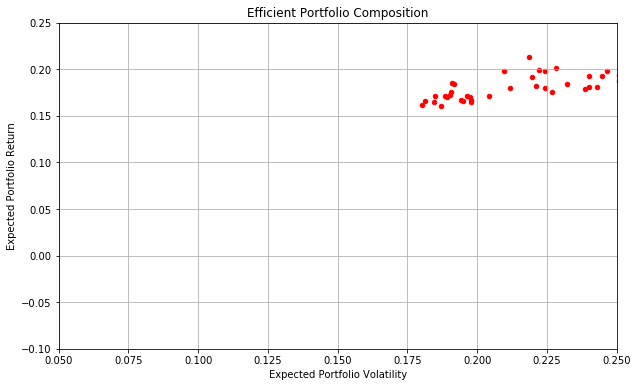

In [21]:
efficient_pfolios.plot(
    x="VOL",
    y="RTN",
    kind="scatter",
    color="red",
    figsize=(10,6)
)
plt.grid(True)
plt.title("Efficient Portfolio Composition")
plt.xlabel("Expected Portfolio Volatility")
plt.ylabel("Expected Portfolio Return")
plt.xlim(.05,.25)
plt.ylim(-.1, .25)


(-0.1, 0.25)

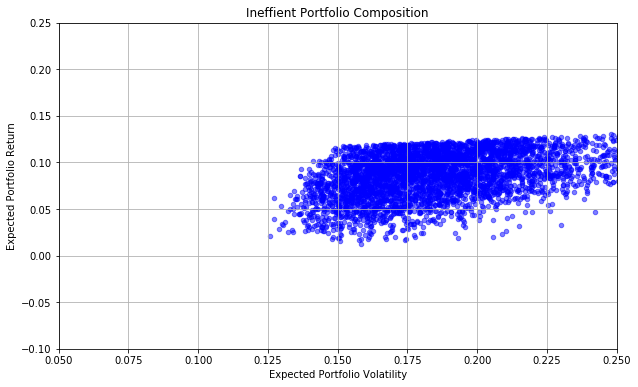

In [22]:
remaining_pfolios.plot(
    x="VOL",
    y="RTN",
    kind="scatter",
    color="blue",
    alpha=.5,
    figsize=(10,6)
)
plt.grid(True)
plt.title("Ineffient Portfolio Composition")
plt.xlabel("Expected Portfolio Volatility")
plt.ylabel("Expected Portfolio Return")
plt.xlim(.05,.25)
plt.ylim(-.1, .25)

(-0.1, 0.2)

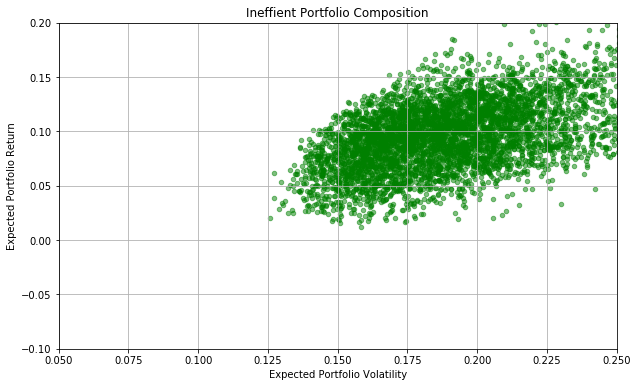

In [23]:
all_pfolios.plot(
    x="VOL",
    y="RTN",
    kind="scatter",
    color="green",
    alpha=.5,
    figsize=(10,6)
)
plt.grid(True)
plt.title("Ineffient Portfolio Composition")
plt.xlabel("Expected Portfolio Volatility")
plt.ylabel("Expected Portfolio Return")
plt.xlim(.05,.25)
plt.ylim(-.1, .2)